MAG DATA DOWNLOAD DIAGNOSTIC (FIXED)
Generated: 2025-10-01 13:57:47

1. IMPORT & SETUP

🕒 Starting import timing session: plotbot_full_initialization
  ⚠️  matplotlib.pyplot: 0.516s
  ✅ numpy: 0.000s
  🔧 Starting block: core_components
initialized server_access
initialized global_tracker
initialized plot_config
initialized plot_manager
initialized epad class
initialized epad_hr class
initialized proton class
initialized proton_hr class
initialized ham_class
initialized psp_alpha class
initialized psp_qtn class
initialized psp_orbit class
initialized psp_span_vdf class
initialized data_cubby.
CDF classes added to data_cubby type map.
  ✅ Block 'core_components' completed in 1.092s
  🔧 Starting block: psp_data_classes
initialized proton_fits class
initialized alpha_fits class
  ✅ Block 'psp_data_classes' completed in 0.002s
  🔧 Starting block: wind_data_classes
  ✅ Block 'wind_data_classes' completed in 0.000s
  🔧 Starting block: data_cubby_registration
  ✅ Block 'data_cubby_registration

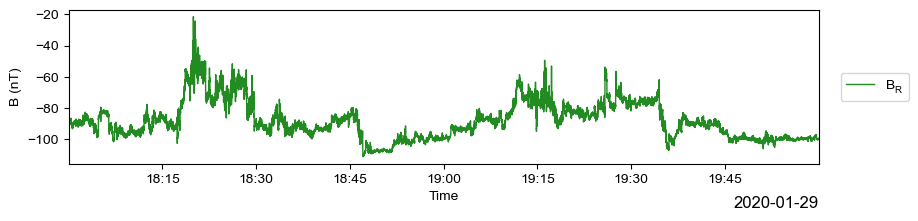


Results:
  br.data type:           <class 'numpy.ndarray'>
  br.data shape:          (32958,)
  datetime_array type:    <class 'numpy.ndarray'>
  datetime_array shape:   (32958,)
  ✅ Data loaded! 32958 points
  First datetime: 2020-01-29T18:00:00.212556160
  Last datetime:  2020-01-29T19:59:59.803320832

5. COMPREHENSIVE FILE SEARCH

Searching for MAG files with '20200129' in name...

Searching in: /Users/robertalexander/GitHub/Plotbot/data (Plotbot data dir)
  ✅ Found 6 MAG file(s):
    - /Users/robertalexander/GitHub/Plotbot/data/psp/fields/{data_level}/dfb_ac_spec/dv12hg/2020/psp_fld_l2_dfb_ac_spec_dv12hg_20200129_v01.cdf
    - /Users/robertalexander/GitHub/Plotbot/data/psp/fields/l2/mag_rtn_4_per_cycle/2020/psp_fld_l2_mag_rtn_4_sa_per_cyc_20200129_v02.cdf
    - /Users/robertalexander/GitHub/Plotbot/data/psp/fields/l2/dfb_ac_spec/dv12hg/2020/psp_fld_l2_dfb_ac_spec_dv12hg_20200129_v01.cdf
    - /Users/robertalexander/GitHub/Plotbot/data/psp/sweap/spe/l3/spe_sf0_pad/2020/psp_swp_spe_